In [1]:
import cymetric as cym
import matplotlib as plt 
import pandas as pd

/Users/gwenchee/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/Users/gwenchee/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/Users/gwenchee/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
from cymetric import fco_metrics
from cymetric import filters
from cymetric import timeseries

In [3]:
db = cym.dbopen('../cyclus-files/oat/cooling-time/ct0.sqlite')
ev = cym.Evaluator(db=db,write=True)

In [ ]:
ep = ev.eval('FcoMonthlyElectricityGenerated')

In [ ]:
ep.plot(x='Month',y='Energy',grid='True')

In [ ]:
hlw = cym.timeseries.transactions(ev,commodities=['lwrreprocessingwaste','moxreprocessingwaste','frreprocessingwaste'])
hlw = hlw['Mass'].cumsum()

In [ ]:
hlw.plot()

In [ ]:
hlw.max()

In [ ]:
du = cym.timeseries.transactions(ev,commodities=['enrichmentwaste'])
du = du['Mass'].cumsum()

In [ ]:
du.plot()

In [ ]:
du.max()

In [4]:
pu_cp = cym.timeseries.inventories(ev,facilities=['fr'])

/Users/gwenchee/anaconda3/lib/python3.6/site-packages/cymetric/timeseries.py:118: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


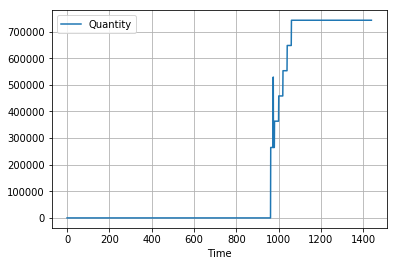

In [7]:
pu_cp.plot(x='Time',y='Quantity',grid='True')

In [10]:
lwr = cym.timeseries.inventories(ev,facilities=['lwr1'])

/Users/gwenchee/anaconda3/lib/python3.6/site-packages/cymetric/timeseries.py:118: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


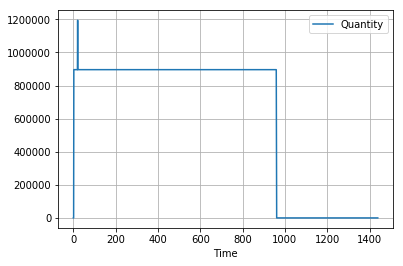

In [11]:
lwr.plot(x='Time',y='Quantity',grid='True')